

### Instructions:

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. 

Your code must be **well documented**. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation).

The total number of marks available is 100. Attempt all parts of all questions.

For this project, you are expected to write your code almost entirely 'from scratch', although you are allowed to use some specific packages like `numpy`, `matplotlib.pyplot`, etc.


---
### The Keeling curve
There is a famous curve depicting the rise in atmospheric carbon dioxide levels as measured by the Mauna Loa Observatory in Hawaii over the last 50 years. This data is known as the [Keeling curve]( https://en.wikipedia.org/wiki/Keeling_Curve).

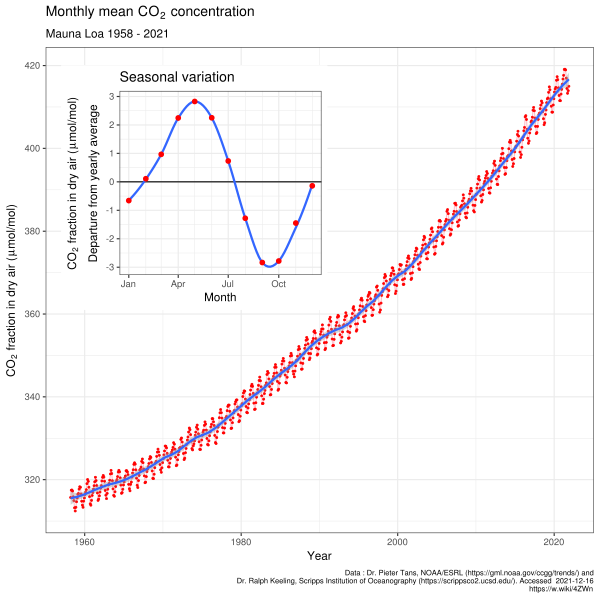

Here, you will consider a differen greenhouse gas, tetrahydrocarbon $CH_4$, more commonly known as **methane**.
This project consists of **four parts**. In each of the parts you will need to code up some specific functions, run some code, and respond to some questions. Recall that all code needs to be properly documented with `# comments`, and the explanations in these comments will indeed be assessed and you will receive lots of marks for adequate documentation. 



* The **first part** is about loading and visualising historical $CH_4$ levels in the atmosphere.

* The **second part** asks you to write code for polynomial fitting.

* The **third part** compares global and local trend fitting.

* The **fourth part** focusses on the seasonal variations.

<br />


---

The following code box is used to load any necessary modules. **You may not import any other modules.**

In [1]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1: Loading and cleaning data [18 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.


---

**[1.1] [8 marks]** Load the data from the file "CH4.txt" into a pandas dataframe named `CH4_df` and display it. You should get a dataframe with 461 rows and 7 columns with the first column looking as follows:
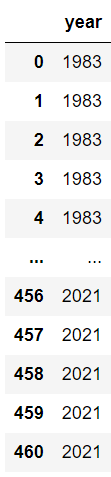

If you encounter difficulties doing this it may help to inspect the content of the csv file in a text editor.

---

---
**[1.2] [6 marks]** Using this dataframe, produce a plot of the methane data contained therein versus time. The relevant columns in the file are labelled "average" and "decimal", containing average methane levels in ppb and the date in years, respectively. 

Clearly label the content, a plot simply showing the defaults "average" and "decimal" will be insufficient. 

If you encounter difficulties it may help to inspect the content of the csv file or the dataframe directly.

---

---
**[1.3] [4 marks]** Comment on whether there are any irregularities such as missing data or outliers.

---


# Part 2: Polynomial fitting [27 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




In this section you will develop a polynomial fitting routine in order to estimate the overall trend in the carbon dioxide curve. 

## Background information

In many applications, we might be given a set of data points

$$(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$$

in the $x,y$-plane, and required to determine whether there is a relationship between the $x$ variable and the $y$ variable. 
For example, a financial analyst might need to determine whether there is a relationship between two stock prices, while a climate scientist might need to know whether temperatures are related to levels of a certain pollutant in the atmosphere.

A common way to determine whether two data sets $x_1, x_2, \ldots, x_n$ and $y_1, y_2, \ldots, y_n$ are related is to find a function

$$y = f(x)$$

that 'best fits' the data, so that each $y_i$ is approximately equal to $f(x_i)$, with very small error. 

In order to find the 'best fit' the data, one attempts to minimise the **sum of squares of the errors (or "SSE")**,

$$SSE = \sum_{i=1}^n (y_i - f(x_i))^2$$

In other words, we want to minimise the sums of the squares of all the differences between the actual $y$-values (the $y_i$) and the 'predicted' $y$-values by substituting the corresponding $x_i$ values into the equation $y = f(x)$.

This process is called **least squares regression**. 

The function $f(x)$ usually depends on certain parameters for which we need to solve. 
For example, to determine whether the $x$- and $y$-variables have a **linear relationship**, we would use a linear function

$$f(x) = a_0 + a_1 x$$

and try to find the parameters $a_0$ and $a_1$ that make $f(x)$ 'best fit' the data. 
This means that we want to find the coefficients $a_0$ and $a_1$ for which the quantity
$$SSE = \sum_{i=1}^n (y_i - a_0 - a_1x_i)^2$$ is minimised.

More generally, **polynomial (least squares) regression** involves assuming that

$$f(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m$$

for some integer $m \geq 1$, and finding the parameters $a_0, a_1, a_2 \ldots, a_m$ that minimise SSE. In other words, we wish to fit a function

$$f(x) = a_0 + a_1x + a_2x^2 + \cdots a_mx^m$$

to our data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, where $m$ is some (chosen but arbitrarily large) positive integer. 
Observe that $m=1$ for linear regression, and $m=2$ for quadratic regression. 
We need to minimise

$$SSE = ||y - f(x)||^2.$$

for polynomial regression we therefore consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0&x_0^2&\cdots&x_0^m \\ 1&x_1&x_1^2&\cdots&x_1^m \\ \vdots&\vdots \\ 1&x_n&x_n^2&\cdots&x_n^m \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right],$$

and we again find that

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2,$$

meaning that $\mathbf{a}$ should be chosen to be a least squares solution of the system $X\mathbf{a} = \mathbf{y}$. 
Hence, we can find $\mathbf{a}$ by solving the normal equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

Python provides this functionality with the function polyfit. If you followed instructions precisely, the following should work for you.

```python

np.polyfit(CH4_df["decimal"],CH4_df["average"],3)


---
**[2.1] [5 marks]** Ensure that the above line of code works for your dataframe.

Note: you may have to consult the documentation about the meaning of the output.

---

---
**[2.2] [10 marks]** This gives you coefficients for a cubic fit. Plot the methane data together with the fitted curve.

---

---
**[2.3] [6 marks]** We now would like you to replace the polyfit function by our own code, without making reference to any provided fitting routines: for this, we provide you with a function `least_squares_solver_polynomial` which takes as input a pandas dataframe with two numerical columns containing x and y values, and the degree $m$ of a polynomial (a positive integer), and computes the corresponding polynomial regression coefficients $a_0, a_1, a_2, \ldots, a_m$ in terms of a list of the form `[a0, a1, a2, ..., am]` containing the $m+1$ coefficients $a_0, a_1, a_2, \ldots, a_m$ in that order:
```python
def least_squares_solver_polynomial(data, m):
    data_np=data.to_numpy()
    n=len(data)
    X=np.ones((n,m+1))
    for j in range(1,m+1):
        X[:,j]=data_np[:,0]**j
    y=data_np[:,1]
    A=X.T@X
    b=X.T@y
    a=np.linalg.solve(A,b)
    return list(a)
```
Compare the output of this function with the output of the built-in np.polyfit() by by using
```python
least_squares_solver_polynomial(CH4_df[["decimal","average"]],N)
```
for several values of the degree $N$ (I suggest to pick 0 to 5 inclusively) and compare the result with corresponding result obtained by using polyfit. How good is the agreement?

---

---
**[2.4] [6 marks]** Next, plot the five fitted polynomials obtained by both methods, over the range of dates used for the fitting. What do you observe?


# Part 3: Global fitting versus local fitting [30 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




If you look carefully you will notice that a cubic fit is perhaps not the best way to capture the trend. There are two ways to improve this

1. You can experiment with taking higher degree polynomials
2. You can do local fits by computing averages

Note: if you did not manage to get least_squares_solver_polynomial to work, you are permitted to use polyfit instead.

---
**[3.1] [10 marks]** A good way to eyeball the quality of the fit and to check for systematic errors is to plot the difference between the actual and the fitted data. Produce plots showing this difference for fits with degrees one (linear) to six and describe what you can conclude.

---


---
**[3.2] [8 marks]** Now produce local fits. A very simple approach is to compute an average across a full year, with the date you want to estimate right in the middle. (Note: depending on how you code this, you may have to make reasonable adjustments towards the start and the end of your time range.)

To do this, you should first write a function
```python
def local_fit(data,xmin,xmax):
    # add your code
    return yaverage
```
that takes a  takes as input a pandas dataframe with two numerical columns containing x and y values, and two values xmin and xmax and returns the average over all values of y for which xmin < x < xmax.

As an example,
```python
local_fit(CH4_df[["decimal","average"]],2000,2001)
```
should give a methane concentration of around 1773 ppb.


---


---
**[3.3] [7 marks]** Now that you have the local averaging, produce two plots, one displaying the average per year and
one displaying the difference to that average.

---


---
**[3.4] [5 marks]** You may have noticed that the file `CH4.txt` contained a column labelled "trend". Compare your local fit with that column by plotting them both in the same graph.

---



# Part 4: Looking at the yearly variations [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




For this part, we consider the difference between the methane levels and the yearly averages. This data, while noisy, seems to oscillate with a period of one year, and it makes therefore sense to look at this oscillation more closely. In an nutshell, we are going to work towards obtaining a picture similar to the one in the inset in the Keeling curve figure at the top of this document.

---
**[4.1] [10 marks]** Plot the differences obtained in Question 3.3 versus the time of year as measured in months.

Note: it is advisable to plot individual data points that are not connected by lines

---


---
**[4.2] [10 marks]** Find a sensible way of interpolating the data you just plotted. Add the curve thus obtained to the plot in the previous question. You may notice that there is some roughness in your plot that indicates that we are at the limit of what we can sensibly analyse.

Note: this question is stated purposefully vaguely to give you a chance to showcase your talent (or your prowess with Google). As a timely reminder, any use of code found online must be carefully referenced, otherwise it will be deemed plagiarism.

---


---
**[4.3] [5 marks]** You are now in a position to clearly separate overall trend, seasonal variation, and residual effects. Finish the project by creating a plot of the residual noise, similar to the bottom graph in the image below. Describe how the residual effects compare to the seasonal variation.

(You are welcome to provide all four plots together, but you will only be assessed on plotting the residual effects.)


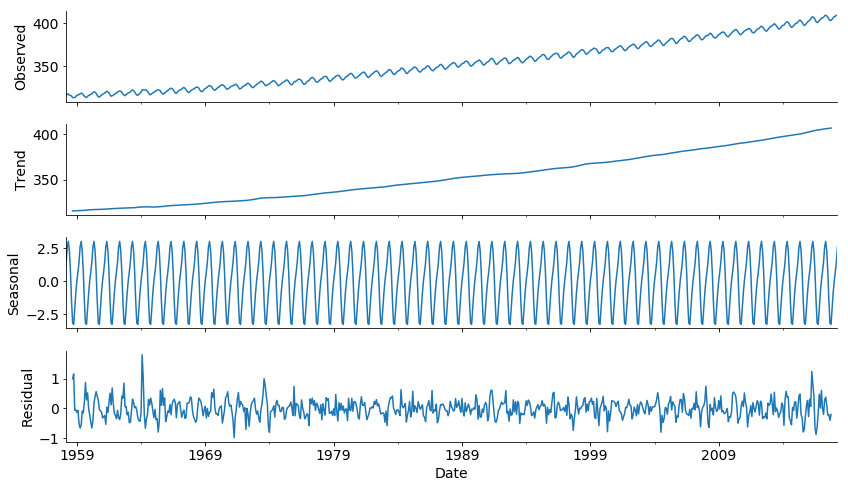

---
